# Generate Figures for Word2Vec Year Models

The goal of this notebook is to observe how words are shifting through time since 2005. The year 2005 was selected as this is the only year the word 'CRISPR' appears in the Word2Vec models. This highlights the catch with Word2Vec models as they require words to appear at a given frequency within abstracts to be captured by the model.

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import pickle

import numpy as np
import pandas as pd
import plotnine as p9
import tqdm
from umap.parametric_umap import ParametricUMAP, load_ParametricUMAP

from biovectors_modules.plot_helper import (
    plot_token_timeline,
    plot_local_global_distances,
    plot_wordcloud_neighbors,
    plot_wordcloud_neighbors_gif,
)
from biovectors_modules.word2vec_analysis_helper import (
    generate_timeline,
    get_neighbors,
    project_token_timeline,
)

# Load Models to Observe Changes

In [2]:
aligned_models = pickle.load(
    open("output/aligned_word_vectors_2005_2020_replace.pkl", "rb")
)

In [3]:
year_comparison_dict = {
    "_".join(comparison_file.stem.split("_")[0:2]): (
        pd.read_csv(str(comparison_file), sep="\t")
    )
    for comparison_file in (list(Path("output/year_distances_2005_2020").rglob("*tsv")))
}
list(year_comparison_dict.keys())[0:3]

['2005_2006', '2005_2016', '2005_2019']

In [4]:
year_comparison_dict["2005_2006"].sort_values("global_dist")

,token,global_dist,local_dist,shift
11854,eine,0.023689,0.000146,0.023542
15576,het,0.024671,0.000038,0.024633
33452,werden,0.024700,0.000104,0.024596
33856,zur,0.029432,0.000104,0.029328
20402,might,0.030203,0.000189,0.030014
...,...,...,...,...
16755,immunosuppressants,1.369532,1.551107,-0.181575
7180,casp,1.370358,1.747629,-0.377271
6149,biocatalysis,1.394467,1.670357,-0.275890
4102,alf,1.407846,1.607599,-0.199753


## Train TSNE Model to Project Time Shifts into Two Dimensional Space

The goal here is to train a TSNE model that projects all words from 2005 to 2020 into a two dimensional space. Allows one to visually track how a word vector is shifting through time.

In [5]:
word_models_stacked = np.vstack(list(aligned_models.values())[:-1])
file_name = "output/2005_2020_umap_model"

In [6]:
if not Path(file_name).exists():
    Path(file_name).mkdir(parents=True)
    model = ParametricUMAP(verbose=True, metric="cosine", random_state=100)
    embedding = model.fit_transform(word_models_stacked)
    model.save(file_name)
else:
    model = load_ParametricUMAP(file_name)
model.verbose = False

ParametricUMAP(optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f713436b1d0>)
Construct fuzzy simplicial set
Sat May  8 11:24:22 2021 Finding Nearest Neighbors
Sat May  8 11:24:22 2021 Building RP forest with 42 trees
Sat May  8 11:24:42 2021 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	 3  /  19
	 4  /  19
	 5  /  19
	 6  /  19
	Stopping threshold met -- exiting after 6 iterations
Sat May  8 11:25:20 2021 Finished Nearest Neighbor Search
Sat May  8 11:25:25 2021 Construct embedding


/home/danich1/anaconda3/envs/biovectors/lib/python3.7/site-packages/umap/parametric_umap.py:270: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.


Epoch 1/10
8882/8882 [==============================] - 101s 11ms/step - loss: 0.2663
Epoch 2/10
8882/8882 [==============================] - 100s 11ms/step - loss: 0.1985
Epoch 3/10
8882/8882 [==============================] - 100s 11ms/step - loss: 0.1901
Epoch 4/10
8882/8882 [==============================] - 100s 11ms/step - loss: 0.1859
Epoch 5/10
8882/8882 [==============================] - 100s 11ms/step - loss: 0.1835
Epoch 6/10
8882/8882 [==============================] - 100s 11ms/step - loss: 0.1815
Epoch 7/10
8882/8882 [==============================] - 100s 11ms/step - loss: 0.1800
Epoch 8/10
8882/8882 [==============================] - 101s 11ms/step - loss: 0.1788
Epoch 9/10
8882/8882 [==============================] - 101s 11ms/step - loss: 0.1779
Epoch 10/10
16961/16961 [==============================] - 5s 318us/step
Sat May  8 11:43:07 2021 Finished embedding
INFO:tensorflow:Assets written to: output/2005_2020_umap_model/encoder/assets
Keras encoder model saved to ou

# Visualize Words Shifting through Time

This section is the same analysis mentioned in [03_word_decade_figure_generator_2000_2020.ipynb](03_word_decade_figure_generator_2000_2020.ipynb). The basic idea is to see how CRISPR shifts through time.

## CRISPR

In [7]:
token_timeline_df = generate_timeline(year_comparison_dict, "crispr")
token_timeline_df.head()

,token,global_dist,local_dist,shift,year_label
9497,crispr,0.322561,0.011248,0.311312,2005_2006
9497,crispr,0.633440,0.168471,0.464969,2005_2016
9497,crispr,0.675305,0.193707,0.481598,2005_2019
9497,crispr,0.573811,0.096072,0.477739,2005_2013
9497,crispr,0.514925,0.084995,0.429930,2005_2012


In [8]:
token_timeline_low_dim_df = project_token_timeline(
    "crispr", aligned_models, model, neighbors=25
)
token_timeline_low_dim_df.query("token=='main'")

,umap_dim1,umap_dim2,year,token,label


In [9]:
global_distance, local_distance = plot_local_global_distances(
    token_timeline_df, token="crispr"
)

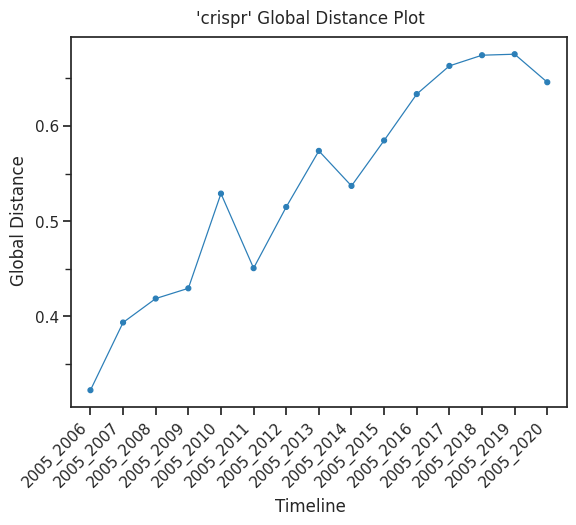

<ggplot: (-9223363279240134638)>

In [10]:
global_distance

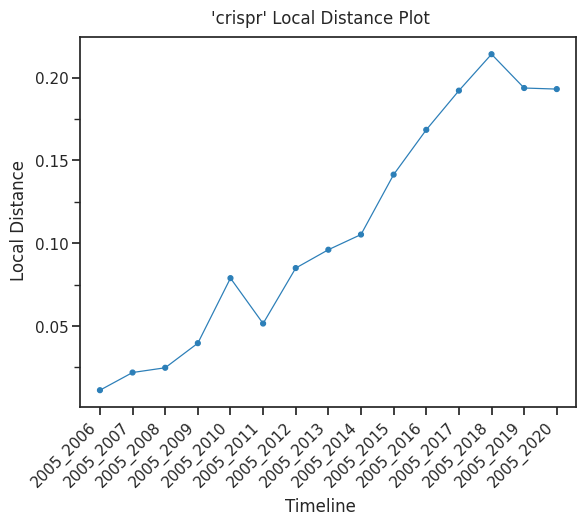

<ggplot: (-9223363279261899327)>

In [11]:
local_distance

/home/danich1/anaconda3/envs/biovectors/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/danich1/anaconda3/envs/biovectors/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/timeline_figures/crispr_time_plot.png


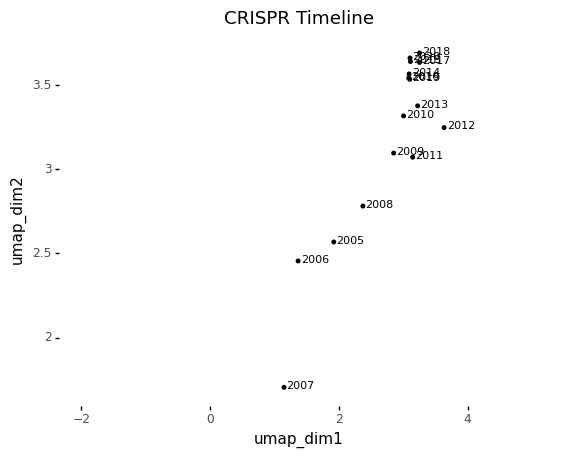

<ggplot: (8757614635461)>


In [12]:
g = plot_token_timeline(token_timeline_low_dim_df)
g.save("output/timeline_figures/crispr_time_plot.png")
print(g)

In [13]:
plot_wordcloud_neighbors_gif(
    token_timeline_low_dim_df,
    plot_filename="output/wordcloud_plots_2005_2020/crispr.gif",
)

![crispr gif here](output/wordcloud_plots_2005_2020/crispr.gif)

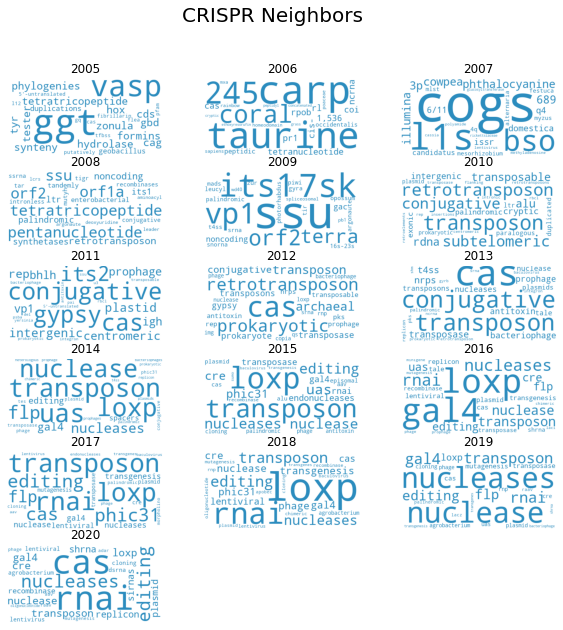

In [14]:
plot_wordcloud_neighbors(
    token_timeline_low_dim_df,
    plot_filename="output/wordcloud_plots_2005_2020/crispr.png",
)

# Conclusions - Take Home Point(s)

1. CRISPR has a nice transition from microbiology to genome editing. Word cloud neighbors does wonders in observing this transition.